In [1]:
import random
import time
import urllib.parse

import requests
from IPython.display import Image, display

In [6]:
query = '(game:paper) not:ub is:commander -o:partner -o:background'
url = 'https://api.scryfall.com/cards/search?q=' + urllib.parse.quote_plus(query)

In [7]:
data = list()

r = requests.get(url)
while r.status_code == 200:
    json = r.json()
    data.extend(json['data'])
    if json['has_more']:
        time.sleep(0.1)
        r = requests.get(json['next_page'])
    else:
        break

print(f'Retrieved {len(data)} cards')

Retrieved 1583 cards


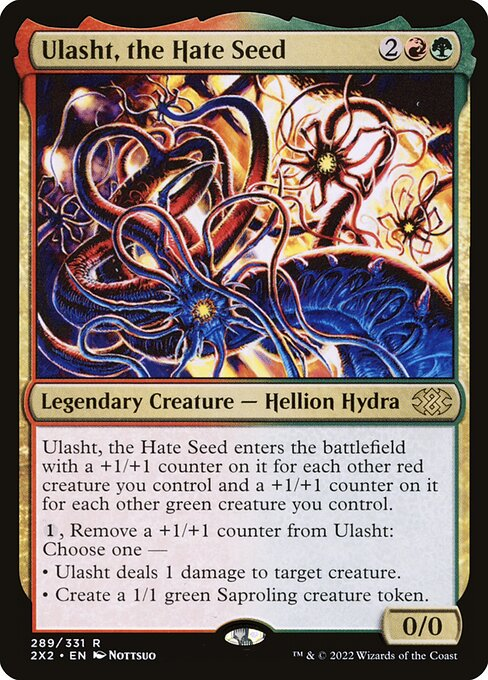

In [9]:
card = data[random.randrange(0, len(data))]

display(Image(requests.get(card['image_uris']['normal']).content))